In [1]:
import scipy as sp, scipy.signal as signal
import matplotlib.pyplot as plt
import timeit
# Forçar o uso de LaTeX
import matplotlib
from matplotlib import rc
%pylab inline
##rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 


def design_FIR(taps, sample_rate):
    nyquist = sample_rate/2
    return signal.firwin2(taps, [0, nyquist/2, nyquist], [1, 1, 0], nyq=nyquist)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
import time
t = time.time()
b = design_FIR(32768, 1000)
#timeit.timeit("design_FIR(8192, 1000)", setup="from __main__ import design_FIR", number=1000)
elapsed = time.time() - t
print(elapsed)
len(b)

0.02124476432800293


32768

In [3]:
speeds = []
for num_taps in [1, 2, 4, 8, 10, 16, 30, 32, 60, 64, 120, 128, 250, 256, 500, 512, 1000, 1024, 2000, 2048, 4000, 4096, 5000, 6000, 7000, 8000, 8192, 9000, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, 15500, 16000, 16384, 20000, 30000, 32768, 40000, 50000, 60000, 65000, 65536]:
    print("Número de taps: ", num_taps)
    times = []
    for _ in range(1000):
        t = time.time()
        b = design_FIR(num_taps, 1000)
        elapsed = time.time() - t
        times.append(elapsed)
        
    speeds.append((num_taps, np.mean(times), np.min(times), np.max(times)))
    

Número de taps:  1
Número de taps:  2
Número de taps:  4
Número de taps:  8
Número de taps:  10
Número de taps:  16
Número de taps:  30
Número de taps:  32
Número de taps:  60
Número de taps:  64
Número de taps:  120
Número de taps:  128
Número de taps:  250
Número de taps:  256
Número de taps:  500
Número de taps:  512
Número de taps:  1000
Número de taps:  1024
Número de taps:  2000
Número de taps:  2048
Número de taps:  4000
Número de taps:  4096
Número de taps:  5000
Número de taps:  6000
Número de taps:  7000
Número de taps:  8000
Número de taps:  8192
Número de taps:  9000
Número de taps:  10000
Número de taps:  10500
Número de taps:  11000
Número de taps:  11500
Número de taps:  12000
Número de taps:  12500
Número de taps:  13000
Número de taps:  13500
Número de taps:  14000
Número de taps:  14500
Número de taps:  15000
Número de taps:  15500
Número de taps:  16000
Número de taps:  16384
Número de taps:  20000
Número de taps:  30000
Número de taps:  32768
Número de taps:  40000


In [2]:
import pickle
output = open('fir_result.pkl', 'wb')

pickle.dump(speeds, output)
output.close()

NameError: name 'speeds' is not defined

Populating the interactive namespace from numpy and matplotlib


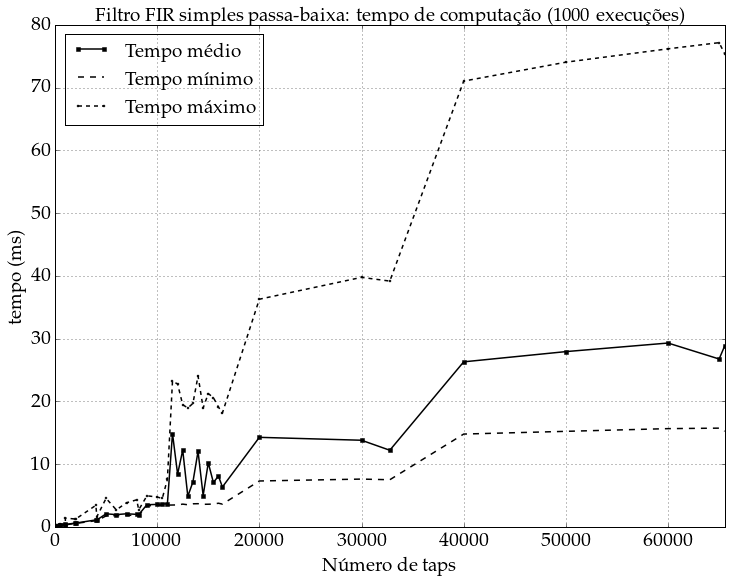

In [2]:
import pickle
output = open('fir_result.pkl', 'rb')
speeds = pickle.load(output)

%pylab inline
fig = plt.figure(1, figsize=(12, 9))
avg_plot, = plt.plot([taps for (taps, time, _, _) in speeds], [time*1000 for (taps, time, _, _) in speeds], 'k.-', linewidth=1.5, markersize=9)
min_plot, = plt.plot([taps for (taps, _, min_time, _) in speeds], [min_time*1000 for (taps, _, min_time, _) in speeds], 'k--', linewidth=1.5, markersize=2)
max_plot, = plt.plot([taps for (taps, _, _, max_time) in speeds], [max_time*1000 for (taps, _, _, max_time) in speeds], 'ko-', linewidth=1.5, markersize=2)

#avg_plot.set_dashes([2, 1, 1, 2])
#min_plot.set_dashes([3, 1, 1, 3])
max_plot.set_dashes([4, 4, 4, 4])
plt.xlabel("N\\'umero de taps", fontsize=19)
plt.ylabel('tempo (ms)', fontsize=19)
plt.axis([1, 65536, 0, 80])
plt.grid()
plt.title('Filtro FIR simples passa-baixa: tempo de computa\c{c}\~ao (1000 execu\c{c}\~oes)', fontsize=19)
plt.legend(["Tempo m\\'edio", "Tempo m\\'inimo", "Tempo m\\'aximo"], loc='best', fontsize=19)
plt.savefig('fir_benchmark.svg')
